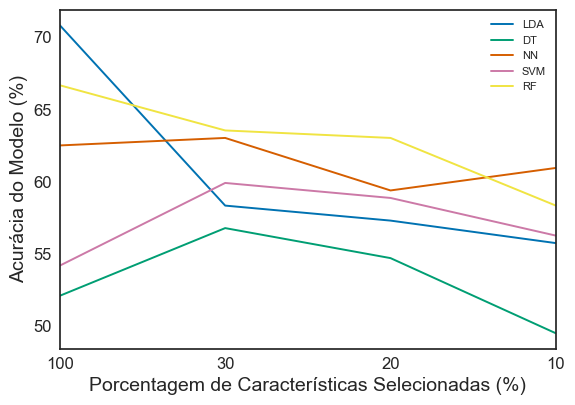

In [ ]:
import matplotlib.pyplot as plt

percentages = [0, 10, 20, 30]

model_results = { #emobase
    "LDA": [60.42, 64.06, 58.32, 53.12],
    "DT":  [41.67, 51.56, 49.48, 54.17],
    "NN":  [66.67, 67.19, 67.71, 71.36],
    "SVM": [72.92, 70.31, 65.63, 68.23],
    "RF":  [62.50, 62.50, 63.54, 63.54],
}

model_results = { #ComParE
    "LDA": [60.42, 65.63, 66.15, 67.19],
    "DT":  [50.00, 48.96, 46.88, 42.19],
    "NN":  [60.42, 63.02, 66.15, 66.15],
    "SVM": [64.58, 64.58, 66.67, 64.06],
    "RF":  [60.42, 62.50, 63.54, 66.15],
} 

model_results = { #eGeMAPS
    "LDA": [70.83, 58.33, 57.29, 55.73],
    "DT":  [52.08, 56.77, 54.69, 49.48],
    "NN":  [62.50, 63.02, 59.38, 60.94],
    "SVM": [54.17, 59.90, 58.86, 56.25],
    "RF":  [66.67, 63.54, 63.02, 58.33],
}

plt.style.use("seaborn-v0_8-white")
plt.style.use("seaborn-v0_8-colorblind")
plt.style.use("seaborn-v0_8-paper")

for model_name, results in model_results.items():
    plt.plot(percentages, results, label=model_name)

plt.xticks(percentages, ["100", "30", "20", "10"], fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0, 30)

plt.tick_params(axis='x', which='both')

plt.xlabel("Porcentagem de Características Selecionadas (%)", fontsize=14)
plt.ylabel("Acurácia do Modelo (%)", fontsize=14)

plt.legend()

#plt.title("Desempenho dos Modelos no Conjunto de Teste com Diferentes Seleções de Características (eGeMAPS)")

plt.savefig("nn_egemaps_size.png", dpi=300, bbox_inches="tight")

plt.show()

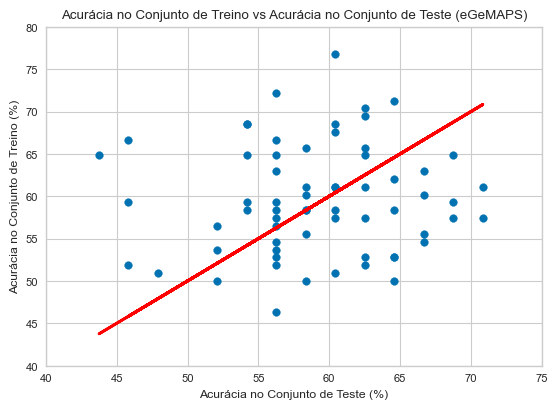

RMSD: 6.354661704970248


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

auto = pd.read_csv('eGeMAPS.csv')

plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use("seaborn-v0_8-colorblind")
plt.style.use("seaborn-v0_8-paper")

plt.scatter(auto['% teste'], auto['% treino'])
plt.title('Acurácia no Conjunto de Treino vs Acurácia no Conjunto de Teste (eGeMAPS)')
plt.xlabel('Acurácia no Conjunto de Teste (%)')
plt.ylabel('Acurácia no Conjunto de Treino (%)')

X = auto['% teste'].values.reshape(-1, 1)
y = auto['% treino'].values
plt.plot(X, X, color='red', linewidth=2)
plt.axis([40, 75, 40, 80])
plt.savefig("out.png", dpi=300, bbox_inches="tight")
plt.show()

A = 1
B = -1
C = 0

distancias = []
for i in range(len(auto)):
    x = auto['% teste'][i]
    y = auto['% treino'][i]
    distancia = abs(A*x + B*y + C) / np.sqrt(A**2 + B**2)
    distancias.append(distancia)

rmsd = np.sqrt(np.mean(np.array(distancias)**2))
print("RMSD:", rmsd)

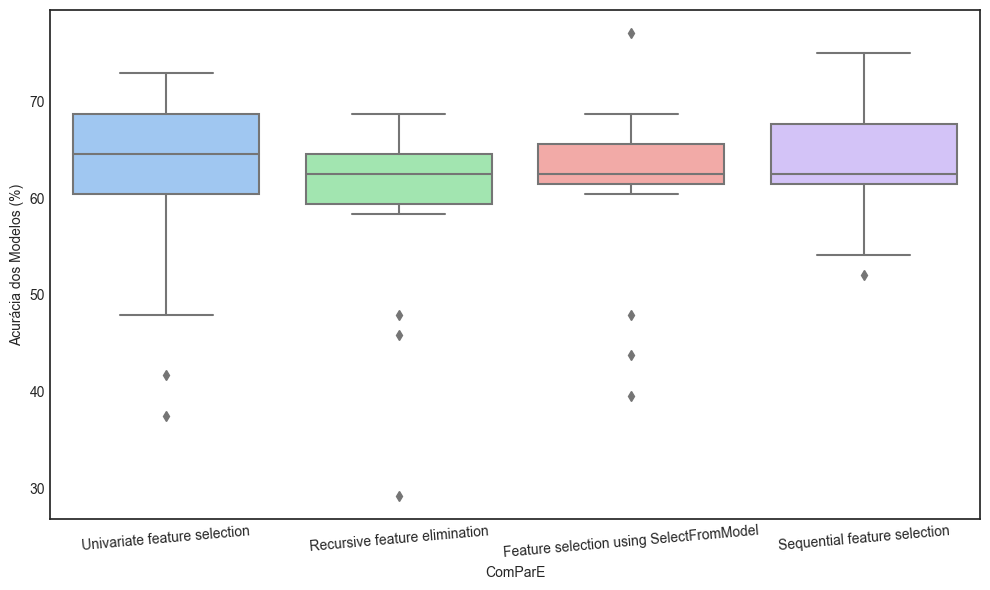

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 
a = pd.DataFrame({ 'group' : np.repeat('Univariate feature selection',15), 'Acurácia dos Modelos (%)':            [66.67, 41.67, 70.83, 68.75, 64.58, 62.50, 37.50, 72.92, 72.92, 62.50, 62.50, 47.92, 58.33, 68.75, 66.67] })
b = pd.DataFrame({ 'group' : np.repeat('Recursive feature elimination',15), 'Acurácia dos Modelos (%)':           [66.67, 29.17, 62.50, 58.33, 68.75, 64.58, 45.83, 64.58, 62.50, 62.50, 68.75, 47.92, 60.42, 64.58, 60.42] })
c = pd.DataFrame({ 'group' : np.repeat('Feature selection using SelectFromModel',15), 'Acurácia dos Modelos (%)': [66.67, 39.58, 64.58, 66.67, 77.08, 62.50, 43.75, 64.58, 62.50, 62.50, 68.75, 47.92, 64.58, 62.50, 60.42] })
d = pd.DataFrame({ 'group' : np.repeat('Sequential feature selection',15), 'Acurácia dos Modelos (%)':            [68.75, 58.33, 66.67, 62.50, 54.17, 75.00, 60.42, 62.50, 68.75, 66.67, 62.50, 52.08, 68.75, 62.50, 62.50] })
df = pd.concat([a, b, c, d], ignore_index=True)  #ComParE
 
e = pd.DataFrame({ 'group' : np.repeat('Univariate feature selection',15), 'Acurácia dos Modelos (%)':            [52.08, 43.75, 68.75, 62.50, 60.42, 60.42, 37.50, 56.25, 62.50, 58.33, 68.75, 39.56, 64.58, 68.75, 62.50] })
f = pd.DataFrame({ 'group' : np.repeat('Recursive feature elimination',15), 'Acurácia dos Modelos (%)':           [62.50, 52.08, 72.92, 68.75, 62.50, 56.25, 45.83, 62.50, 68.75, 62.50, 56.25, 47.92, 60.42, 70.83, 58.33] })
g = pd.DataFrame({ 'group' : np.repeat('Feature selection using SelectFromModel',15), 'Acurácia dos Modelos (%)': [52.08, 50.00, 72.92, 70.83, 58.33, 64.52, 41.67, 79.17, 70.83, 58.33, 62.50, 50.00, 72.92, 70.83, 58.33] })
h = pd.DataFrame({ 'group' : np.repeat('Sequential feature selection',15), 'Acurácia dos Modelos (%)':            [45.83, 70.83, 70.83, 70.83, 72.92, 52.08, 72.92, 72.92, 60.42, 75.00, 68.75, 68.75, 70.83, 70.83, 70.83] })
df = pd.concat([e, f, g, h], ignore_index=True)  #emobase

i = pd.DataFrame({ 'group' : np.repeat('Univariate feature selection',15), 'Acurácia dos Modelos (%)':            [60.42, 29.17, 62.50, 58.33, 68.75, 54.17, 47.92, 52.08, 62.50, 70.83, 56.25, 45.83, 66.67, 62.50, 58.33] })
j = pd.DataFrame({ 'group' : np.repeat('Recursive feature elimination',15), 'Acurácia dos Modelos (%)':           [56.25, 56.25, 58.33, 60.42, 52.08, 54.17, 64.58, 58.33, 56.25, 56.25, 58.33, 60.42, 56.25, 54.17, 62.50] })
k = pd.DataFrame({ 'group' : np.repeat('Feature selection using SelectFromModel',15), 'Acurácia dos Modelos (%)': [62.50, 56.25, 64.58, 60.42, 56.25, 64.58, 60.42, 66.67, 62.50, 64.58, 60.42, 58.33, 68.75, 66.67, 64.58] })
l = pd.DataFrame({ 'group' : np.repeat('Sequential feature selection',15), 'Acurácia dos Modelos (%)':            [43.75, 56.25, 58.33, 45.83, 56.25, 56.25, 45.83, 60.42, 54.17, 60.42, 58.33, 62.50, 60.42, 56.25, 68.75] })
df = pd.concat([a, b, c, d], ignore_index=True)  #eGeMAPS

plt.figure(figsize=(10, 6))

plt.style.use("seaborn-v0_8-white")
plt.style.use("seaborn-v0_8-pastel")
sns.boxplot(x='group', y='Acurácia dos Modelos (%)', data=df)
plt.xticks(rotation=5)
plt.xlabel('ComParE')
plt.savefig("out.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

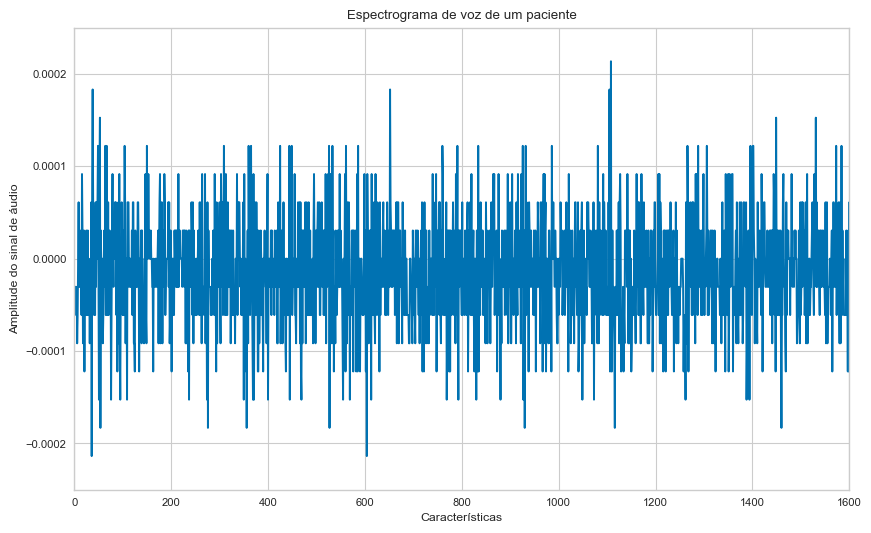

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('4.csv', header=None)

values = data.values

plt.figure(figsize=(10, 6))
for i in range(len(values)):
    plt.plot(values[i], label=f'Exemplo {i+1}')

plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use("seaborn-v0_8-colorblind")
plt.style.use("seaborn-v0_8-paper")

plt.xlabel('Características')
plt.ylabel('Amplitude do sinal de áudio')
plt.title('Espectrograma de voz de um paciente')
plt.axis([0, 1600, -0.00025, 0.00025])
plt.savefig("4.png", dpi=300, bbox_inches="tight")
plt.show()